## Final Project Submission

Please fill out:
* Student name: Ian Musau, Mathew Karani, Jacinta Chepkemoi, Christine Malinga and Tabitha Berum.
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


## Business Problem

#### Overview
King County Realty has tasked the team with defining the most promising houses to sell on the market. A dataset was provided with data on the houses sold in the area.

#### Objectives
Determine which characteristics of a house which:
- Make it a popular among consumers
- lucrative choice for King County Realty

Data Preparation


In [134]:
# import necessary libraries
import pandas as pd
import numpy as np


In [135]:
#Loading the dataset
house_data=pd.read_csv("data/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [136]:
#loading the summary metadata
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [137]:
#checking for duplicates
def check_duplicates(dataset):
    duplicates = dataset.duplicated()
    if duplicates.any():
        duplicated_rows = dataset[duplicates]
        print("Duplicate rows:")
        print(duplicated_rows)
    else:
        print("No duplicates found.")
check_duplicates(house_data)

No duplicates found.


In [138]:
#checking for missing values
def check_missing_values(dataset):
    missing_values = dataset.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)
    else:
        print("No missing values found.")

check_missing_values(house_data)

Missing values found:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [139]:
#loading summary statistics for each column
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [140]:
#dropping the rows with the missing values in the view column
def drop_missing_view_rows(dataset):
    dataset.dropna(subset=['view'], inplace=True)

In [141]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [142]:
#converting the waterfront and year renovated columns to integers
def convert_string_to_int(dataset, columns):
    for column in columns:
        dataset[column] = pd.to_numeric(dataset[column], errors='coerce')
columns_to_convert = ['waterfront', 'yr_renovated'] 
convert_string_to_int(house_data, columns_to_convert)

In [143]:
# Replace missing values in 'waterfront' and 'yr_renovated' columns with the mean
def replace_missing_with_mean_for_columns(dataset, columns):
    for column in columns:
        dataset[column].fillna(dataset[column].mean(), inplace=True)

columns_to_replace = ['waterfront', 'yr_renovated'] 
replace_missing_with_mean_for_columns(house_data, columns_to_replace)


In [144]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [145]:
#reloading the data set
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [146]:
drop_missing_view_rows(house_data)
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long       

In [147]:
#Dropping the waterfront column since it contains missing values
house_data.drop('waterfront', axis=1, inplace=True)

# Verify the changes
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   view           21534 non-null  object 
 9   condition      21534 non-null  object 
 10  grade          21534 non-null  object 
 11  sqft_above     21534 non-null  int64  
 12  sqft_basement  21534 non-null  object 
 13  yr_built       21534 non-null  int64  
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_living

Checking for outliers

In [148]:
def detect_outliers_iqr(df, threshold=1.5):
    outliers = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
            outliers[column] = df.loc[outlier_indices]
    return outliers


outliers_dict = detect_outliers_iqr(house_data, threshold=2.0)

# Print outliers for each column
for column, outliers_df in outliers_dict.items():
    print(outliers_df)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []
               id        date      price  bedrooms  bathrooms  sqft_living  \
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
49      822039084   3/11/2015  1350000.0         3       2.50         2753   
69     1802000060   6/12/2014  1330000.0         5       2.25         3200   
125    4389200955    3/2/2015  1450000.0         4       2.75         2750   
153    7855801670    4/1/2015  2250000.0         4       3.25         5180   
...           ...         ...        ...       ...        ...          ...   
21535  1561750040  12/24/2014  1380000.0         5       4.50         4350   
21552   524059330   1/30/2015  1700000.0         4       3.50         3830   
21560  9253900271    1/7/2015  3570000.0         5       4.50         4

Replacing the outliers with the mean

In [149]:
def replace_outliers_with_mean(df, threshold=1.5):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            # Replace outliers with the mean
            outlier_indices = (df[column] < lower_bound) | (df[column] > upper_bound)
            df.loc[outlier_indices, column] = df[column].mean()
    return df

house_data_cleaned = replace_outliers_with_mean(house_data, threshold=1.5)
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  float64
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  float64
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  float64
 6   sqft_lot       21534 non-null  float64
 7   floors         21534 non-null  float64
 8   view           21534 non-null  object 
 9   condition      21534 non-null  object 
 10  grade          21534 non-null  object 
 11  sqft_above     21534 non-null  float64
 12  sqft_basement  21534 non-null  object 
 13  yr_built       21534 non-null  float64
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  float64
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_living

/tmp/ipykernel_997097/2423783818.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4582351016.287034' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, column] = df[column].mean()
/tmp/ipykernel_997097/2423783818.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.3730379864400484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, column] = df[column].mean()
/tmp/ipykernel_997097/2423783818.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2079.8278536268226' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, column] = df[column].mean()
/tmp/ipykernel_997097/2423783818.py:12: Futu

Data Understanding

In [150]:
import pandas as pd
import matplotlib.pyplot as plt


In [151]:
# Load the dataset into a pandas DataFrame
house_data = pd.read_csv('data/kc_house_data.csv')


In [152]:
# Info of Data
inf = house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# EDA

First we further refine the dataset to make it more suitable for visualization. Unused columns are dropped and price formatted to thousands.

In [153]:
eda_df = house_data_cleaned.copy()
eda_df.drop("date", axis=1, inplace=True)
eda_df.drop("id", axis=1, inplace=True)
eda_df.price = eda_df.price / 1000
eda_df.sqft_basement = eda_df.sqft_basement.apply(lambda x : 0 if x == "?" else x)
eda_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221.9,3.0,1.00,1180.0,5650.0,1.0,NONE,Average,7 Average,1180.0,0.0,1955.0,0.000000,98178.0,47.5112,-122.257,1340.0,5650.0
1,538.0,3.0,2.25,2570.0,7242.0,2.0,NONE,Average,7 Average,2170.0,400.0,1951.0,83.742215,98125.0,47.7210,-122.319,1690.0,7639.0
2,180.0,2.0,1.00,770.0,10000.0,1.0,NONE,Average,6 Low Average,770.0,0.0,1933.0,83.742215,98028.0,47.7379,-122.233,2720.0,8062.0
3,604.0,4.0,3.00,1960.0,5000.0,1.0,NONE,Very Good,7 Average,1050.0,910.0,1965.0,0.000000,98136.0,47.5208,-122.393,1360.0,5000.0
4,510.0,3.0,2.00,1680.0,8080.0,1.0,NONE,Average,8 Good,1680.0,0.0,1987.0,0.000000,98074.0,47.6168,-122.045,1800.0,7503.0


Then we get a breakdown of the data in the price column.

In [154]:
eda_df.price.describe()

count    21534.000000
mean       480.083506
std        202.673668
min         78.000000
25%        322.000000
50%        450.000000
75%        590.000000
max       1120.000000
Name: price, dtype: float64

Then we reduce the grade column to only the number rating for visualization.

In [155]:
eda_df.grade = eda_df.grade.apply(lambda x : x.split(" ")[0].strip())
eda_df.grade.value_counts()

grade
7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: count, dtype: int64

Some functions were created to convert categorical columns to a numerical data type.

In [156]:
def column_values_list(column):
    return list(dict(eda_df[column].value_counts().items()))

def str_column_to_int(column):
    replacement = 0
    for value in column_values_list(column):
        eda_df[column] = eda_df[column].apply(lambda x : replacement if x == value else x)
        replacement += 1

We then change the categorical column "view" to a numerical one.

In [157]:
eda_df.view.value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [158]:
str_column_to_int("view")
eda_df.view.value_counts()

view
0    19422
1      957
2      508
3      330
4      317
Name: count, dtype: int64

Categorical column "condition" is also changed to a numeric value.

In [159]:
str_column_to_int("condition")
eda_df.condition.value_counts()

condition
0    13981
1     5657
2     1697
3      170
4       29
Name: count, dtype: int64

We then view the correlation of price against various columns.

In [160]:
eda_df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.581669
grade            0.573017
sqft_living15    0.508827
sqft_above       0.474044
lat              0.432947
bathrooms        0.424381
bedrooms         0.290729
floors           0.274164
sqft_basement    0.222340
view             0.203565
long             0.092386
sqft_lot         0.086452
sqft_lot15       0.067868
yr_built         0.061169
yr_renovated     0.030432
condition       -0.013279
zipcode         -0.021363
Name: price, dtype: float64

#### Observations

It seems that living area square footage is the most correlated with the price of the house. Conversely, the zipcode and condition of the house are negatively correlated with the price. This indicates that asa they increase, the price of the house decreases.

### Visualizations

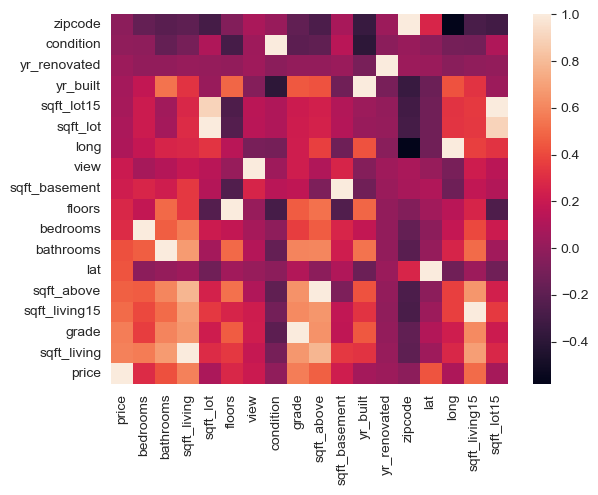

In [161]:
import seaborn as sns

sns.set_style("darkgrid")

corr_matrix = eda_df.corr().sort_values("price")
sns.heatmap(corr_matrix);

### Observations

The heat map confirms the correlation table we saw before.

A function was created to visualize price against various columns.

In [162]:
def price_vs_column(column, alias, reg = True):
    if reg:
        ax = sns.regplot(
            x=eda_df[column],
            y=eda_df.price,
            line_kws={
                "color" : "green"
            }
        )
        ax.set(
            xlabel=alias,
            ylabel="Price (in Thousands)",
            title="{} vs Price".format(alias)
        );
    else:
        ax = sns.scatterplot(
            x=eda_df[column],
            y=eda_df.price,
        )
        ax.set(
            xlabel=alias,
            ylabel="Price (in Thousands)",
            title="{} vs Price".format(alias)
        );

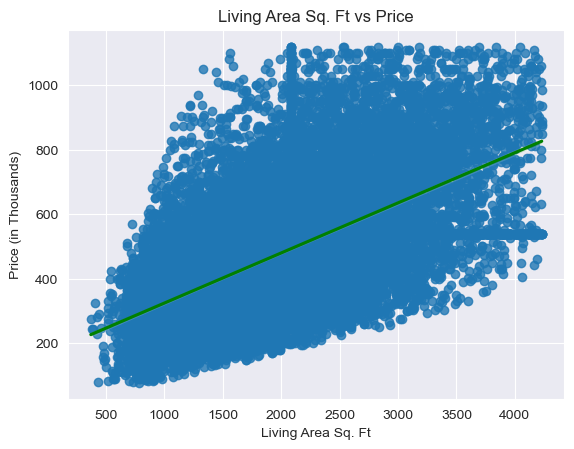

In [163]:
price_vs_column("sqft_living", "Living Area Sq. Ft")

### Observations

We see that as living area square footage increases, so does the price.

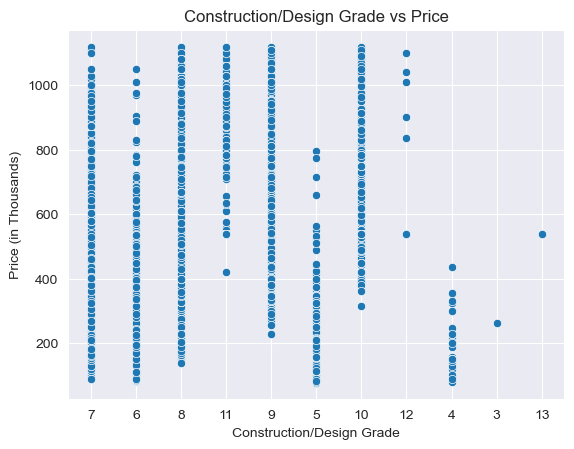

In [164]:
price_vs_column("grade", "Construction/Design Grade", reg=False)

### Observations

All grades contain prices across the whole spectrum.

Next, we view the effect of number of bedrooms on price.

bedrooms
3.000000    9791
4.000000    6865
2.000000    2754
5.000000    1596
3.373038     528
Name: count, dtype: int64


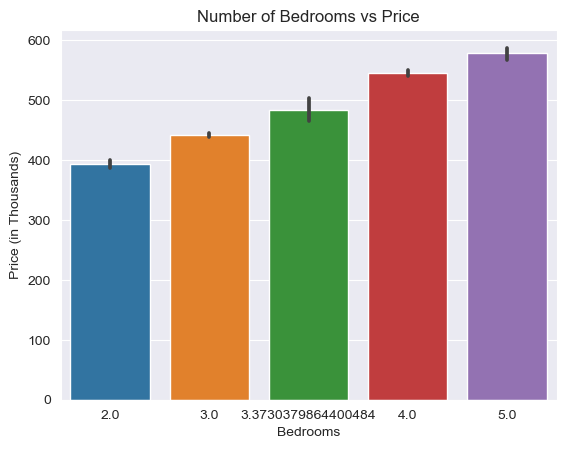

In [165]:
print(eda_df.bedrooms.value_counts())
ax = sns.barplot(x=eda_df.bedrooms, y=eda_df.price)
ax.set(
    xlabel = "Bedrooms",
    ylabel = "Price (in Thousands)",
    title = "Number of Bedrooms vs Price"
);

### Observations

As the number of bedrooms increases, so does the average price, but the most popular choice among customers was 3 bedrooms.

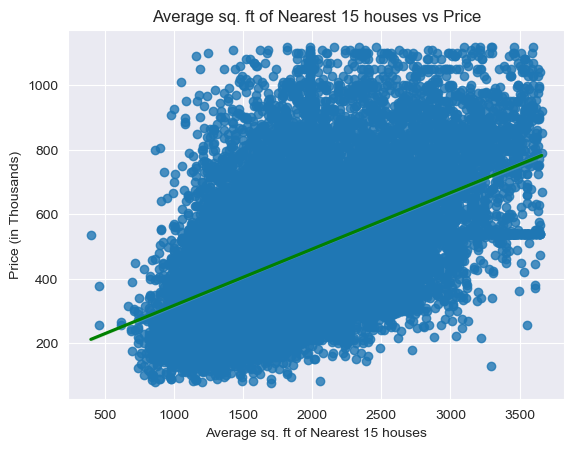

In [166]:
price_vs_column("sqft_living15", "Average sq. ft of Nearest 15 houses")

### Observations

As the sqaure footage of the surrounding houses increases, so does the price of the house.

## Modeling

First, we examine the data.

In [205]:
modeling_df = eda_df.copy()
modeling_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221.9,3.0,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,0.0,1955.0,0.000000,98178.0,47.5112,-122.257,1340.0,5650.0
1,538.0,3.0,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,400.0,1951.0,83.742215,98125.0,47.7210,-122.319,1690.0,7639.0
2,180.0,2.0,1.00,770.0,10000.0,1.0,0,0,6,770.0,0.0,1933.0,83.742215,98028.0,47.7379,-122.233,2720.0,8062.0
3,604.0,4.0,3.00,1960.0,5000.0,1.0,0,2,7,1050.0,910.0,1965.0,0.000000,98136.0,47.5208,-122.393,1360.0,5000.0
4,510.0,3.0,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,0.0,1987.0,0.000000,98074.0,47.6168,-122.045,1800.0,7503.0


Location columns are dropped so as to preserve the privacy of the home owners.

In [206]:
modeling_df.drop("lat", axis=1, inplace=True)
modeling_df.drop("long", axis=1, inplace=True)
modeling_df.drop("zipcode", axis=1, inplace=True)
modeling_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221.9,3.0,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,0.0,1955.0,0.000000,1340.0,5650.0
1,538.0,3.0,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,400.0,1951.0,83.742215,1690.0,7639.0
2,180.0,2.0,1.00,770.0,10000.0,1.0,0,0,6,770.0,0.0,1933.0,83.742215,2720.0,8062.0
3,604.0,4.0,3.00,1960.0,5000.0,1.0,0,2,7,1050.0,910.0,1965.0,0.000000,1360.0,5000.0
4,510.0,3.0,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,0.0,1987.0,0.000000,1800.0,7503.0


A function that shows correlations of a particular column.

In [207]:
def column_corr(column):
    return modeling_df.corr()[column].sort_values(ascending=False)

In [208]:
column_corr("price")

price            1.000000
sqft_living      0.581669
grade            0.573017
sqft_living15    0.508827
sqft_above       0.474044
bathrooms        0.424381
bedrooms         0.290729
floors           0.274164
sqft_basement    0.222340
view             0.203565
sqft_lot         0.086452
sqft_lot15       0.067868
yr_built         0.061169
yr_renovated     0.030432
condition       -0.013279
Name: price, dtype: float64

As living area square footage will form the basis of our analysis, we drop columns highly correlated with it as the will not provide new information about the price variance.

In [209]:
column_corr("sqft_living")

sqft_living      1.000000
sqft_above       0.782000
sqft_living15    0.686455
bathrooms        0.678441
grade            0.660632
price            0.581669
bedrooms         0.565456
floors           0.342023
sqft_basement    0.339116
yr_built         0.325029
sqft_lot         0.293303
sqft_lot15       0.272764
view             0.186155
yr_renovated     0.015627
condition       -0.100556
Name: sqft_living, dtype: float64

In [210]:
to_drop = ["sqft_living15", "sqft_above", "grade", "bathrooms"]
modeling_df.drop(columns=to_drop, inplace=True)
modeling_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,sqft_lot15
0,221.9,3.0,1180.0,5650.0,1.0,0,0,0.0,1955.0,0.000000,5650.0
1,538.0,3.0,2570.0,7242.0,2.0,0,0,400.0,1951.0,83.742215,7639.0
2,180.0,2.0,770.0,10000.0,1.0,0,0,0.0,1933.0,83.742215,8062.0
3,604.0,4.0,1960.0,5000.0,1.0,0,2,910.0,1965.0,0.000000,5000.0
4,510.0,3.0,1680.0,8080.0,1.0,0,0,0.0,1987.0,0.000000,7503.0


In [211]:
column_corr("price")

price            1.000000
sqft_living      0.581669
bedrooms         0.290729
floors           0.274164
sqft_basement    0.222340
view             0.203565
sqft_lot         0.086452
sqft_lot15       0.067868
yr_built         0.061169
yr_renovated     0.030432
condition       -0.013279
Name: price, dtype: float64

#### Simple Linear Regression

As living area square footage has the most correlation with price, we ues it to build a simple model.

In [212]:
from statsmodels.formula.api import ols

formula = "price ~ sqft_living"
model = ols(formula, modeling_df).fit()
summary = model.summary()
print("Model is significant: {}".format(model.f_pvalue < 0.05))
print(summary)

Model is significant: True
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                 1.101e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        00:57:29   Log-Likelihood:            -1.4049e+05
No. Observations:               21534   AIC:                         2.810e+05
Df Residuals:                   21532   BIC:                         2.810e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     169.1084 

#### Observations
- The model only describes about 33% of the variation of the price and thus is not efective.
- An intercept coefficient of 169.1084 (in thousands) tells us that a house with 0 square foot living area will cost $169,108.40.
- With a coefficient of 0.1554 (in thousands), we can expect the price of a house to rise by about $155.40 per square foot added.
- Both the intercept and sqft_living coeffiients are statistically significant as shown by their low p value scores.
- A Kurtosis score of greater than 3 indicates that the dstribution has heavier tails probably due to outliers.
- A skewness of 0.660 tells us that the distribution has a moderate positive skew. This means that the distribution has more values extending towards the higher end.

### Multiple Linear Regression

Next we test if adding all columns will improve the model.

A function that returns all independent columns in formula form and another that creates a model using all independent variables.

In [213]:
def all_columns():
    return "+".join(modeling_df.columns.difference(["price"]))
all_columns()

def model_all_independent():
    multi_formula = "price ~ "+all_columns()
    return ols(multi_formula, modeling_df).fit()

In [214]:
multi_model = model_all_independent()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     47.52
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        00:57:34   Log-Likelihood:            -1.3926e+05
No. Observations:               21534   AIC:                         2.791e+05
Df Residuals:                   21223   BIC:                         2.816e+05
Df Model:                         310                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

#### Observations
Many of the sqft_basement dummy variables and year renovated are not statistically significant. As a result we will drop the columns.

In [215]:
to_drop = ["sqft_basement", "yr_renovated"]
modeling_df.drop(columns=to_drop, inplace=True)
modeling_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,yr_built,sqft_lot15
0,221.9,3.0,1180.0,5650.0,1.0,0,0,1955.0,5650.0
1,538.0,3.0,2570.0,7242.0,2.0,0,0,1951.0,7639.0
2,180.0,2.0,770.0,10000.0,1.0,0,0,1933.0,8062.0
3,604.0,4.0,1960.0,5000.0,1.0,0,2,1965.0,5000.0
4,510.0,3.0,1680.0,8080.0,1.0,0,0,1987.0,7503.0


In [216]:
multi_model = model_all_independent()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     1727.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        00:57:35   Log-Likelihood:            -1.3960e+05
No. Observations:               21534   AIC:                         2.792e+05
Df Residuals:                   21525   BIC:                         2.793e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2750.2225     88.576     31.049      